In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import numpy as np
import joblib
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set paths for training and test data
train_dir = r'D:\Onedrive\Desktop\L6\fruits-360-original-size\Training'
test_dir = r'D:\Onedrive\Desktop\L6\fruits-360-original-size\Test'


In [3]:
# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

In [4]:
# Load DenseNet201 for feature extraction
feature_extractor = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor.trainable = False  # Freeze the DenseNet201 model


In [5]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4821 images belonging to 15 classes.
Found 2408 images belonging to 15 classes.


In [6]:
# Build DenseNet201 Transfer Learning model
print("Building DenseNet201 Transfer Learning model...")
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Building DenseNet201 Transfer Learning model...


In [7]:
# Train DenseNet201 Transfer Learning Model
print("Training DenseNet201 Transfer Learning model...")
start_time = time.time()
history = model.fit(train_data, epochs=EPOCHS, validation_data=test_data)
train_time = time.time() - start_time


Training DenseNet201 Transfer Learning model...


c:\Users\LEGION\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - accuracy: 0.1494 - loss: 3.0506 - val_accuracy: 0.6217 - val_loss: 1.2874
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.7395 - loss: 1.0669 - val_accuracy: 0.9165 - val_loss: 0.6301
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.8882 - loss: 0.6678 - val_accuracy: 0.8937 - val_loss: 0.4746
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 405s 3s/step - accuracy: 0.9097 - loss: 0.4326 - val_accuracy: 0.9726 - val_loss: 0.3010
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 428s 3s/step - accuracy: 0.9531 - loss: 0.3323 - val_accuracy: 0.9925 - val_loss: 0.2271


In [8]:
# Evaluate DenseNet201 model
print("Evaluating DenseNet201 Transfer Learning model...")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Transfer Learning Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Transfer Learning Training Time: {train_time:.2f} seconds")

Evaluating DenseNet201 Transfer Learning model...
76/76 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9963 - loss: 0.1947
Transfer Learning Test Accuracy: 99.25%
Transfer Learning Training Time: 2104.50 seconds


In [10]:
# Save the Transfer Learning model
tl_model_path = r'D:\Onedrive\Desktop\L6\densenet201_transfer_learning_model.keras'
model.save(tl_model_path)
print(f"DenseNet201 Transfer Learning model saved at '{tl_model_path}'")

DenseNet201 Transfer Learning model saved at 'D:\Onedrive\Desktop\L6\densenet201_transfer_learning_model.keras'


In [11]:
# Function to extract features using DenseNet201
def extract_features(data, model):
    features = []
    labels = []
    for batch_images, batch_labels in data:
        batch_features = model.predict(batch_images)
        batch_features = batch_features.reshape(batch_features.shape[0], -1)  # Flatten features
        features.append(batch_features)
        labels.append(batch_labels)
        if len(features) * BATCH_SIZE >= data.samples:  # Stop when all data is processed
            break
    return np.vstack(features), np.vstack(labels)

In [13]:
# Extract features for training and testing
print("Extracting features for training data...")
train_features, train_labels = extract_features(train_data, feature_extractor)

print("Extracting features for test data...")
test_features, test_labels = extract_features(test_data, feature_extractor)

Extracting features for training data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━

In [14]:
# Convert one-hot encoded labels to integers
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

In [15]:
# Train KNN on extracted features and measure training time
print("Training K-Nearest Neighbors classifier...")
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(train_features, train_labels)
train_time = time.time() - start_time

Training K-Nearest Neighbors classifier...


In [18]:
# Calculate KNN training accuracy
knn_train_predictions = knn.predict(train_features)
knn_training_accuracy = accuracy_score(train_labels, knn_train_predictions)
print(f"KNN Training Accuracy: {knn_training_accuracy * 100:.2f}%")

KNN Training Accuracy: 100.00%


In [16]:
# Evaluate KNN model
print("Evaluating DenseNet201 + KNN model...")
test_predictions = knn.predict(test_features)

Evaluating DenseNet201 + KNN model...


In [17]:
# Calculate metrics
accuracy = accuracy_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions, average='weighted')
print(f"KNN Test Accuracy: {accuracy * 100:.2f}%")
print(f"KNN F1 Score: {f1:.2f}")

KNN Test Accuracy: 100.00%
KNN F1 Score: 1.00


In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[157   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 159   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 160   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 234   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 156   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 154   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 140   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 154   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 159]]


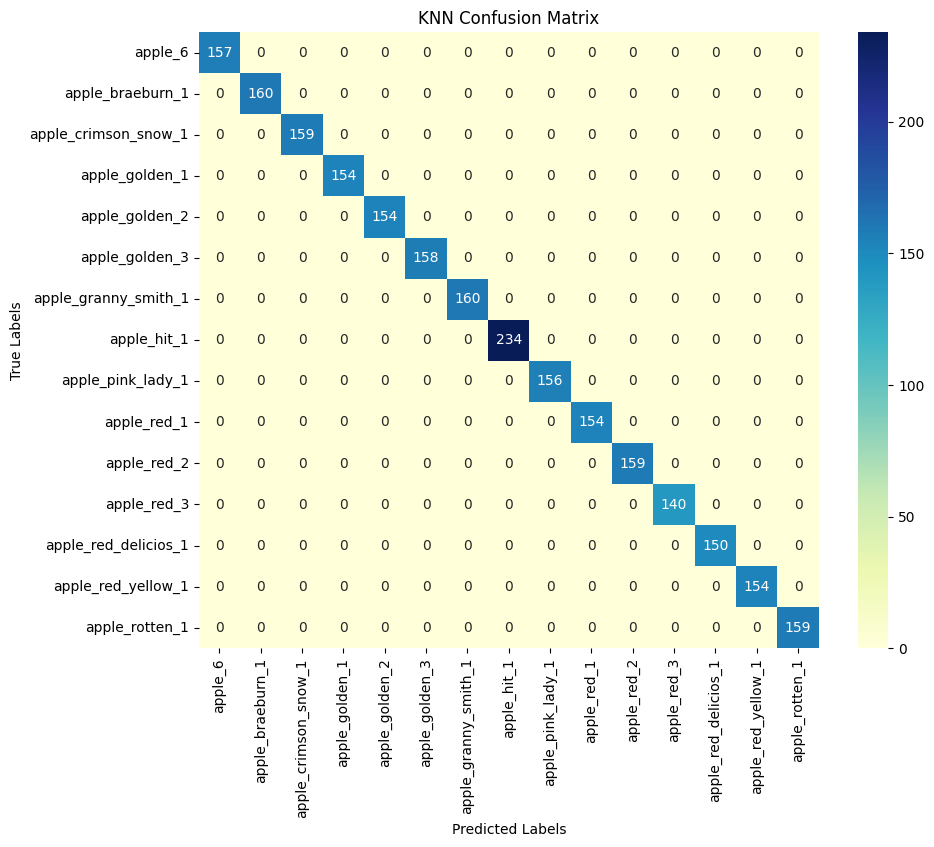

In [21]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('KNN Confusion Matrix')
plt.show()

In [22]:
# Save the KNN model with class information
knn.classes_ = list(train_data.class_indices.keys())
knn_model_path = r'D:\Onedrive\Desktop\L6\knn_model.joblib'
joblib.dump(knn, knn_model_path)
print(f"KNN Model saved at '{knn_model_path}'")

KNN Model saved at 'D:\Onedrive\Desktop\L6\knn_model.joblib'
